# Value Iteration
In this notebook, you are going to implement a value-based approach for solving a MDP, called *Value Iteration*.

The total points of **_Value Iteration_** implementation is **30 POINTS**.

## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gridworld import Environment
from utils import plot_policy, plot_values, test_agent

c:\Users\vamsi\miniconda3\Lib\site-packages\pygame\pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
c:\Users\vamsi\miniconda3\Lib\site-packages\pkg_resources\__init__.py:3144: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('ruamel')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)


## Initialize the environment

In [2]:
env = Environment()
state = env.reset()

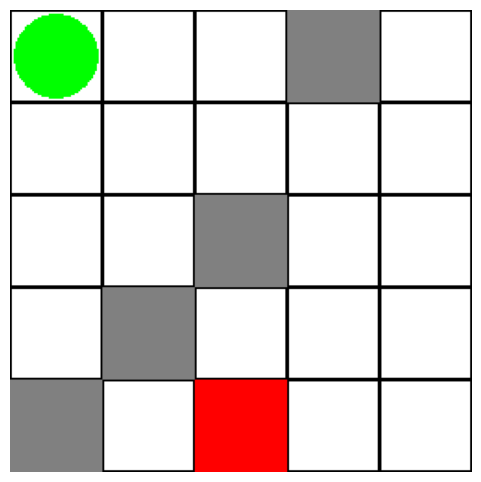

In [3]:
frame = env.render()
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [5]:
policy_probs = np.full((env.GH, env.GW, 4), 0.25)
print(policy_probs)

[[[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]]


In [6]:
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [7]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

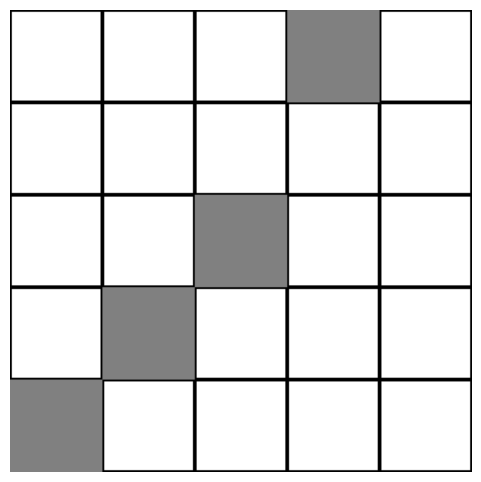

In [8]:
test_agent(env, policy, episodes=1)

#### Plot the policy

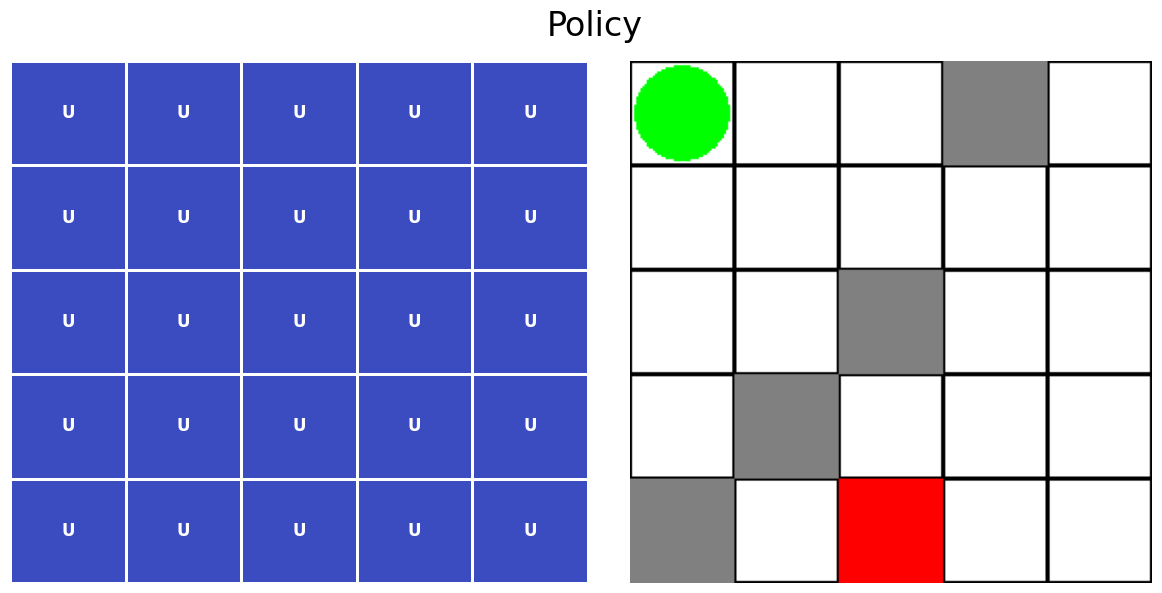

In [9]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [10]:
state_values = np.zeros(shape=(env.GH,env.GW))
print(state_values)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


#### Plot $V(s)$

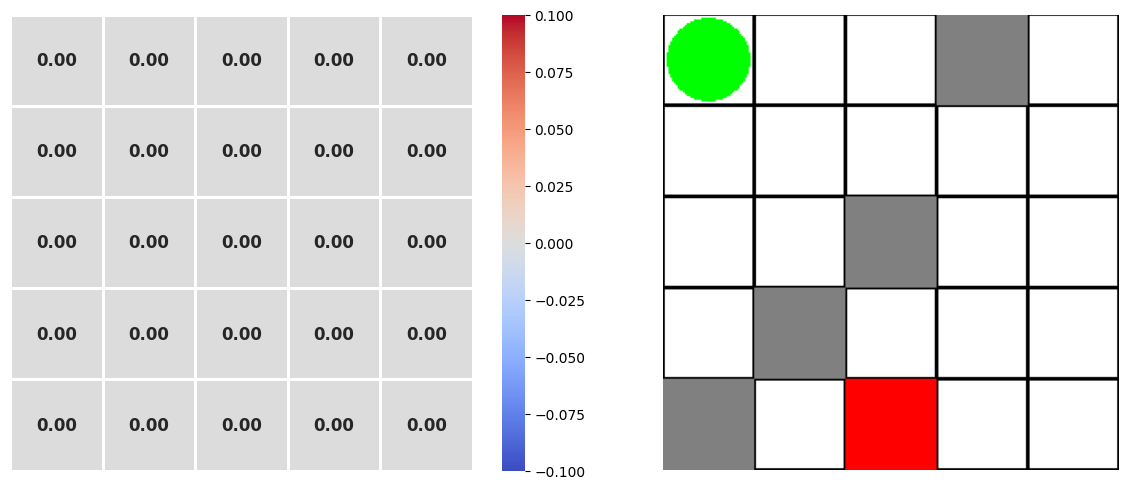

In [11]:
plot_values(state_values, frame)

## Implement the Value Iteration algorithm
<a target="_parent">
    <img src="value-iteration.png" width="50%"/>
</a> 
<!-- ![Value iteration algorithm](value-iteration.png) -->



#### Insert your code here to implement the Value Iteration algorithm.

In [12]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.9):
    env = Environment()
    env.reset()  # Initialize the environment
    
    while True:
        delta = 0
        
        for i in range(env.GH):
            for j in range(env.GW):
                # Skip updating value for obstacle cells
                if (i, j) in env.OBSTACLES_YX:
                    continue
                
                v = state_values[i, j]
                
                # Calculate the value for each action
                action_values = np.zeros(4)
                for a in range(4):
                    next_state, reward, terminal, _ = env.simulate_step((i, j), a)
                    
                    # Use the provided policy probabilities
                    prob = policy_probs[i, j, a]
                    
                    # If the next state is an obstacle, use the current state's value
                    if next_state in env.OBSTACLES_YX:
                        next_value = state_values[i, j]
                    else:
                        next_value = state_values[next_state[0], next_state[1]]
                    
                    # Apply the Bellman equation
                    action_values[a] = prob * (reward + gamma * next_value)
                
                # Update the state value to the sum of action values
                new_v = np.sum(action_values)
                state_values[i, j] = new_v
                
                # Update delta
                delta = max(delta, abs(v - new_v))
        
        # Check for convergence
        if delta < theta:
            break
    
    return state_values

In [13]:
env = Environment()
state = env.reset()
state_values = np.zeros(shape=(env.GH,env.GW))
value_iteration(policy_probs, state_values)

array([[0.01679042, 0.02433701, 0.03840463, 0.        , 0.11813802],
       [0.01670869, 0.02863414, 0.0695427 , 0.17249838, 0.17064676],
       [0.01212927, 0.01667552, 0.        , 0.35397346, 0.29714811],
       [0.00839601, 0.        , 1.33573839, 0.74959721, 0.49889105],
       [0.        , 1.74152801, 2.51554382, 1.14294141, 0.67165829]])

## Show results

#### Show resulting value table $V(s)$

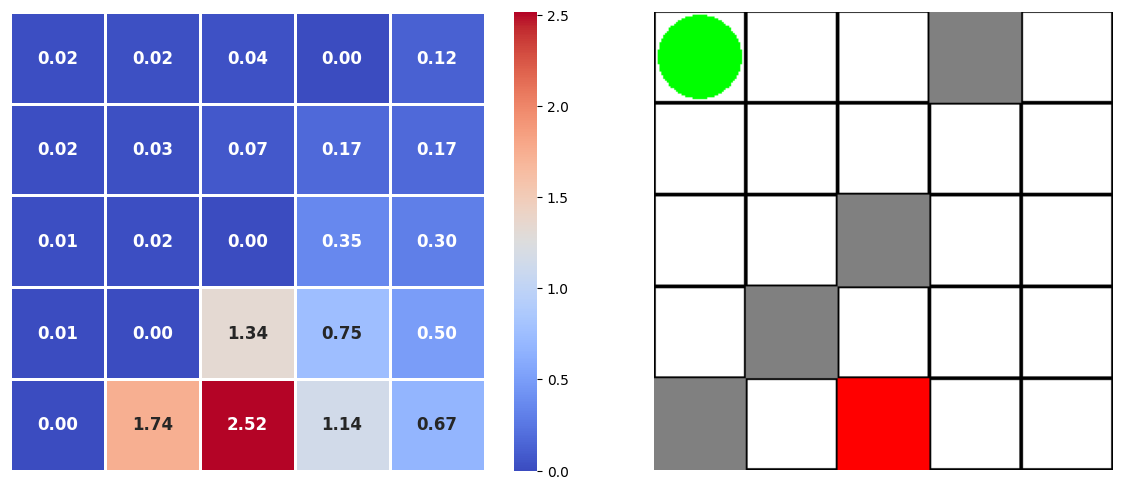

In [14]:
plot_values(state_values, frame)

#### Show resulting policy $\pi(\cdot|s)$

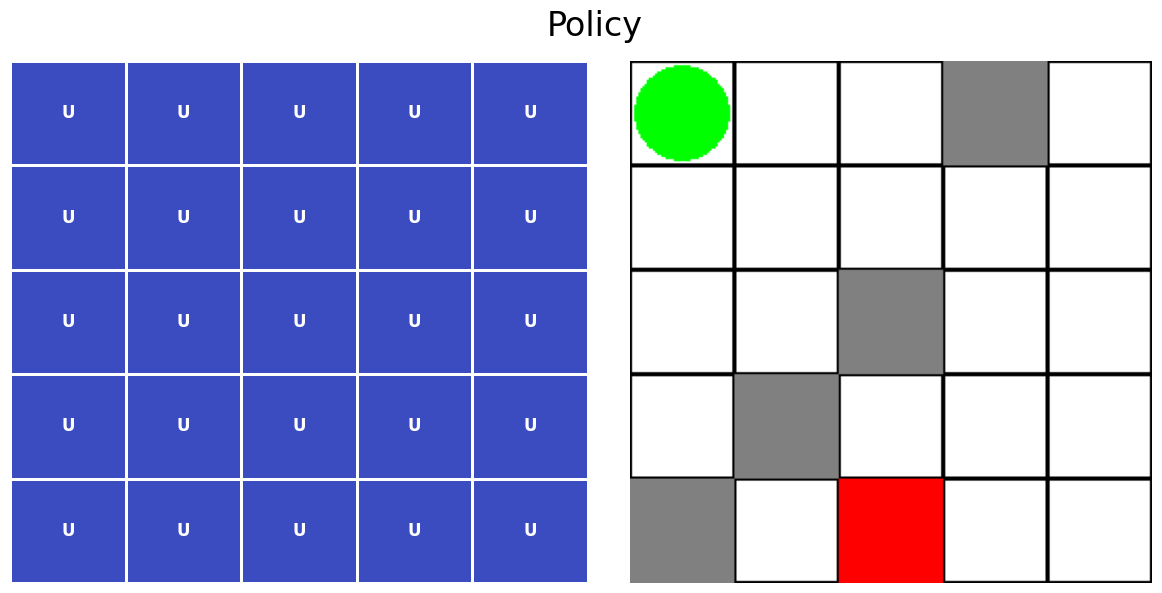

In [15]:
plot_policy(policy_probs, frame)

#### Test the resulting agent

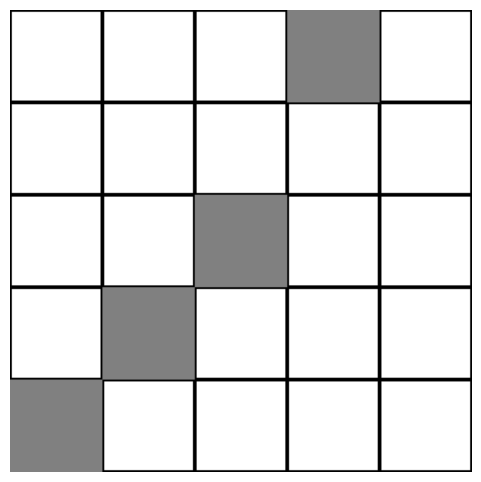

In [16]:
test_agent(env, policy, episodes=1)